## Analisis temporal

In [1]:
import pandas as pd
import numpy as np

* **Conversión de fechas**: Pandas permite convertir cadenas de texto a objetos de tiempo con facilidad.

* **Resampling**: Cambiar la frecuencia de tus datos de tiempo.

In [2]:
# Conversión de fechas
df = pd.DataFrame({'date': pd.date_range(start = '2023-01-01',periods=365), 'value':np.random.randint(10,20,365)})
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2023-01-01,11
1,2023-01-02,18
2,2023-01-03,13
3,2023-01-04,19
4,2023-01-05,18
...,...,...
360,2023-12-27,10
361,2023-12-28,18
362,2023-12-29,11
363,2023-12-30,10


<Axes: xlabel='date'>

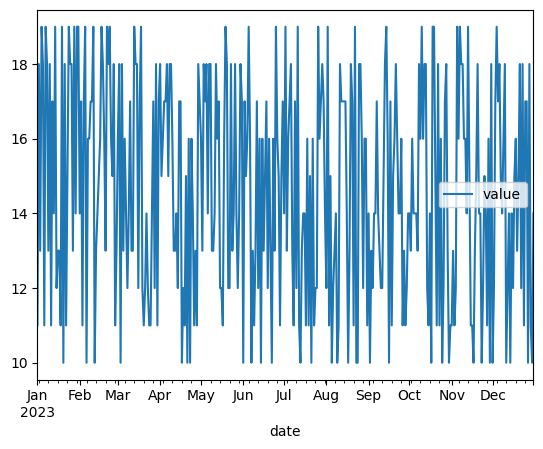

In [3]:
df.plot(y = "value", x = "date")

In [17]:
# Resampling
df_dateindx = df.set_index('date')
df_dateindx["value"]

date
2023-01-01    11
2023-01-02    18
2023-01-03    13
2023-01-04    19
2023-01-05    18
              ..
2023-12-27    10
2023-12-28    18
2023-12-29    11
2023-12-30    10
2023-12-31    14
Name: value, Length: 365, dtype: int64

<Axes: xlabel='date'>

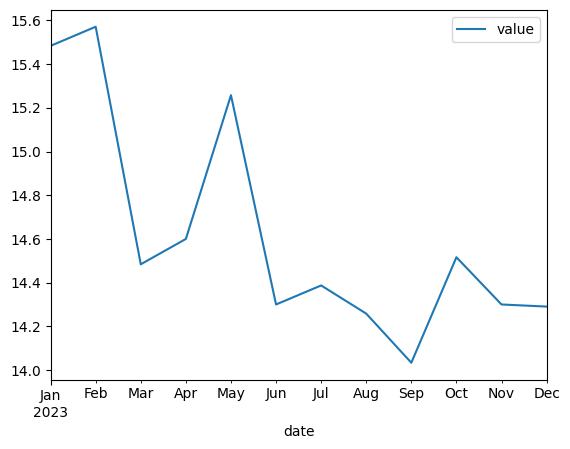

In [11]:
df_resampled = df_dateindx.resample('M').mean()  # Media mensual
df_resampled.plot()

## Operaciones con texto

* Split: Dividir una columna de texto en varias columnas.

* Replace: Reemplazar texto en una columna.

In [13]:
# Split
df2 = pd.DataFrame({'name': ['John Smith', 'Jane Doe']})
df2
df2[['first_name', 'last_name']] = df2['name'].str.split(' ', expand=True)
df2


,name,first_name,last_name
0,John Smith,John,Smith
1,Jane Doe,Jane,Doe


In [14]:
# Replace
df2['first_name'] = df2['first_name'].str.replace('John', 'Jon')
df2

,name,first_name,last_name
0,John Smith,Jon,Smith
1,Jane Doe,Jane,Doe


## Fusión y Combinación


* Merge: Combinar dos DataFrames basados en una columna en común.

* Concat: Concatenar dos DataFrames vertical u horizontalmente.

* Join: Realizar joins tipo SQL en DataFrames.

In [25]:
# Merge
df1 = pd.DataFrame({'key': ['A', 'B'], 'value1': [1, 2]})
df2 = pd.DataFrame({'key': ['A', 'B'], 'value2': [3, 4]})
merged_df = pd.merge(df1, df2, on='key')

merged_df


,key,value1,value2
0,A,1,3
1,B,2,4


In [26]:
# Concat
concat_df = pd.concat([df1, df2], axis=0)
concat_df

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,NaN
0,A,NaN,3.0
1,B,NaN,4.0


## Manipulación de Índices


* Set Index: Establecer una columna como índice.

* Reset Index: Restablecer el índice del DataFrame.

* Multi-Index: Usar múltiples niveles de índice.

In [29]:
# Set Index
df1.set_index('key', inplace=False)
df1.reset_index(inplace = False)

,index,key,value1
0,0,A,1
1,1,B,2


In [30]:
# Reset Index
df.reset_index(inplace=False)
df

,date,value
0,2023-01-01,11
1,2023-01-02,18
2,2023-01-03,13
3,2023-01-04,19
4,2023-01-05,18
...,...,...
360,2023-12-27,10
361,2023-12-28,18
362,2023-12-29,11
363,2023-12-30,10


## Transformación de Datos


* Map y Apply: Aplicar funciones a elementos o columnas del DataFrame.

* Pivot Tables: Crear tablas dinámicas.

In [46]:
# Map y Apply
df['value1_squared'] = df['value'].map(lambda x: x ** 2)
df['value1_doubled'] = df['value'].apply(lambda x: x * 2)
df
df["eval"]=df['value'].map(lambda x: "A" if x >=15 else "B" )
# df = df.set_index("date")
df

,value,value1_squared,value1_doubled,eval
date,,,,
2023-01-01,11,121,22,B
2023-01-02,18,324,36,A
2023-01-03,13,169,26,B
2023-01-04,19,361,38,A
2023-01-05,18,324,36,A
...,...,...,...,...
2023-12-27,10,100,20,B
2023-12-28,18,324,36,A
2023-12-29,11,121,22,B


In [43]:
df.pivot(values="value", columns="eval")
df.melt()

<ipython-input-43-66d400d2e671>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df.melt()


,variable,value
0,value,11
1,value,18
2,value,13
3,value,19
4,value,18
...,...,...
1455,eval,B
1456,eval,A
1457,eval,B
1458,eval,B


## Visualización


Pandas tiene integración con Matplotlib, permitiéndote visualizar tus DataFrames con facilidad.

<Axes: ylabel='Frequency'>

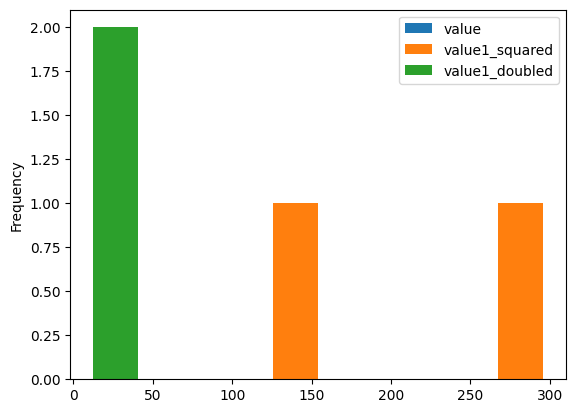

In [53]:
# Usando Pandas para visualizar
# df.set_index("date", inplace=True)
df.groupby("eval").mean().plot(kind = "hist")


## Estadísticas Avanzadas


Correlación: Encontrar la correlación entre las columnas.

Covarianza: Calcular la covarianza entre las columnas.

In [ ]:
# Correlación
correlation = df.corr(numeric_only=True)
correlation



,value,value1_squared,value1_doubled
value,1.0000,0.9961,1.0000
value1_squared,0.9961,1.0000,0.9961
value1_doubled,1.0000,0.9961,1.0000


In [ ]:
# Covarianza
covariance = df.cov(numeric_only=True)
covariance

,value,value1_squared,value1_doubled
value,7.790727,225.970300,15.581454
value1_squared,225.970300,6605.695740,451.940599
value1_doubled,15.581454,451.940599,31.162908
